# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
# Empty list for holding the cities names
cities = []
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL
url ='http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=' + weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url  + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]       
        city_date = city_weather["dt"]
            # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass








print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Number of cities in the list: 614
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bud
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | arlit
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | kieta
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | miles city
Processing Record 10 of Set 1 | dubbo
Processing Record 11 of Set 1 | nakonde
Processing Record 12 of Set 1 | bambanglipuro
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | shitanjing
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | toliary
City not found. Skipping...
Processing Record 17 of Set 1 | stephenville
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | vaitupu
City not found. Skipping...
P

City not found. Skipping...
Processing Record 32 of Set 4 | hami
Processing Record 33 of Set 4 | syracuse
Processing Record 34 of Set 4 | harper
Processing Record 35 of Set 4 | labrea
Processing Record 36 of Set 4 | homer
Processing Record 37 of Set 4 | mayo
Processing Record 38 of Set 4 | lata
Processing Record 39 of Set 4 | victoria
Processing Record 40 of Set 4 | kirensk
Processing Record 41 of Set 4 | najran
Processing Record 42 of Set 4 | kracheh
City not found. Skipping...
Processing Record 43 of Set 4 | araouane
Processing Record 44 of Set 4 | gadsden
Processing Record 45 of Set 4 | port keats
Processing Record 46 of Set 4 | ponta do sol
Processing Record 47 of Set 4 | gafanha da encarnacao
Processing Record 48 of Set 4 | kronshagen
Processing Record 49 of Set 4 | chokurdakh
Processing Record 0 of Set 5 | churapcha
Processing Record 1 of Set 5 | bognor regis
Processing Record 2 of Set 5 | saint-augustin
Processing Record 3 of Set 5 | tezu
Processing Record 4 of Set 5 | haines ju

Processing Record 25 of Set 8 | ayan
Processing Record 26 of Set 8 | bartica
Processing Record 27 of Set 8 | zeya
Processing Record 28 of Set 8 | port blair
Processing Record 29 of Set 8 | mtwara
Processing Record 30 of Set 8 | mongoumba
Processing Record 31 of Set 8 | leningradskiy
Processing Record 32 of Set 8 | huarmey
Processing Record 33 of Set 8 | zabol
Processing Record 34 of Set 8 | taft
Processing Record 35 of Set 8 | carlyle
Processing Record 36 of Set 8 | faanui
Processing Record 37 of Set 8 | tiarei
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | havelock
Processing Record 40 of Set 8 | karaul
City not found. Skipping...
Processing Record 41 of Set 8 | ust-ilimsk
Processing Record 42 of Set 8 | brookhaven
Processing Record 43 of Set 8 | benguela
Processing Record 44 of Set 8 | kaoma
Processing Record 45 of Set 8 | bereda
Processing Record 46 of Set 8 | coquimbo
Processing Record 47 of Set 8 | tasbuget
City not found. Skipping...
Processing Rec

Processing Record 16 of Set 12 | strezhevoy
Processing Record 17 of Set 12 | vila velha
Processing Record 18 of Set 12 | kalaleh
Processing Record 19 of Set 12 | labutta
City not found. Skipping...
Processing Record 20 of Set 12 | mugumu
Processing Record 21 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 22 of Set 12 | tsabong
Processing Record 23 of Set 12 | frontera
Processing Record 24 of Set 12 | ahipara
Processing Record 25 of Set 12 | tulsipur
Processing Record 26 of Set 12 | sittingbourne
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | eslov
Processing Record 29 of Set 12 | dhone
Processing Record 30 of Set 12 | cazaje
City not found. Skipping...
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | estacion coahuila
Processing Record 33 of Set 12 | port hawkesbury
Processing Record 34 of Set 12 | santiago del estero
Processing Record 35 of Set 12 | richards bay
Processing Record 36 of Set 12 | svetlogorsk
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFra
city_data_df =pd.DataFrame(city_data)
city_data_df.count()

City                   547
Lat                    547
Lng                    547
Max Temp               547
Current Description    547
Humidity               547
Cloudiness             547
Wind Speed             547
Country                547
Date                   547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,6.79,light rain,87,100,1.03,AR,1678045982
1,Svetlaya,46.5389,138.3297,0.92,clear sky,70,6,3.68,RU,1678046120
2,Barra Patuca,15.8000,-84.2833,28.36,clear sky,61,5,5.64,HN,1678046120
3,Arraial Do Cabo,-22.9661,-42.0278,32.98,clear sky,61,0,5.14,BR,1678046120
4,Punta Arenas,-53.1500,-70.9167,8.06,overcast clouds,81,100,9.77,CL,1678046064


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,Ushuaia,-54.8000,-68.3000,6.79,light rain,87,100,1.03,AR,1678045982
1,Svetlaya,46.5389,138.3297,0.92,clear sky,70,6,3.68,RU,1678046120
2,Barra Patuca,15.8000,-84.2833,28.36,clear sky,61,5,5.64,HN,1678046120
3,Arraial Do Cabo,-22.9661,-42.0278,32.98,clear sky,61,0,5.14,BR,1678046120
4,Punta Arenas,-53.1500,-70.9167,8.06,overcast clouds,81,100,9.77,CL,1678046064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

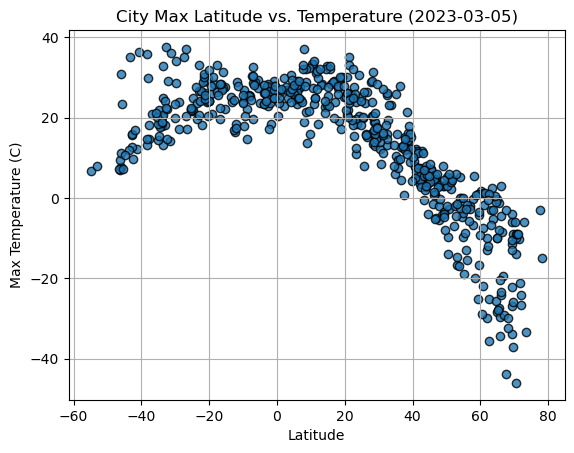

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save figure
plt.savefig("latitude vs temperature.png")

# Show plot
plt.show()

 Latitude Vs. Humidity

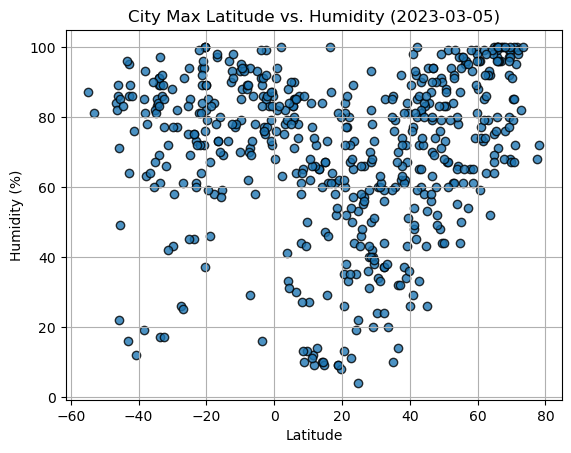

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save figure
plt.savefig("latitude vs Humidity.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

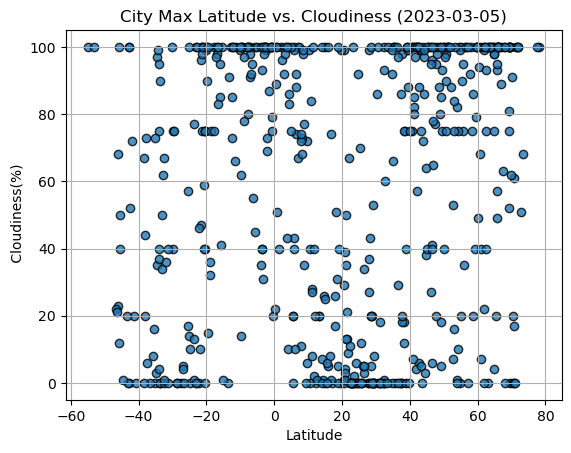

In [10]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel(" Cloudiness(%)")
plt.grid(True)

# Save figure
plt.savefig("Max Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

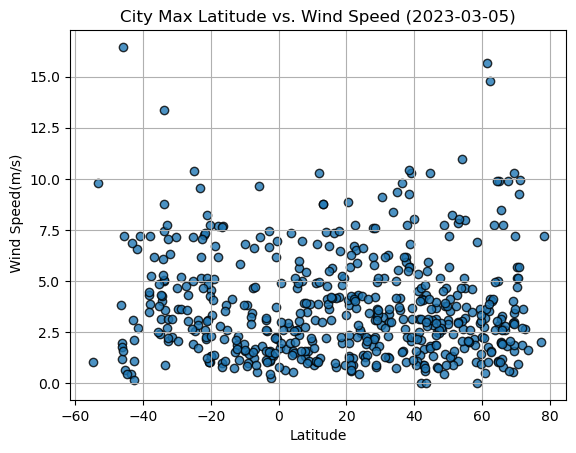

In [11]:
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel(" Wind Speed(m/s)")
plt.grid(True)

# Save figure
plt.savefig("Latitude vs. Wind Speed.png" )

# Show plot
plt.show()

## ---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
 #Define a function to create Linear Regression plots
    
def plot_linear_regression(x_values,y_values,title,text_coordinates):
        
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max temp")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head ()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
1,Svetlaya,46.5389,138.3297,0.92,clear sky,70,6,3.68,RU,1678046120
2,Barra Patuca,15.8000,-84.2833,28.36,clear sky,61,5,5.64,HN,1678046120
8,Westport,41.1415,-73.3579,12.27,overcast clouds,48,85,5.36,US,1678046121
9,Lagoa,39.0500,-27.9833,14.12,overcast clouds,67,99,10.29,PT,1678046121
10,Bosobolo,4.1833,19.9000,30.55,overcast clouds,33,100,0.53,CD,1678046121


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,
0,Ushuaia,-54.8000,-68.3000,6.79,light rain,87,100,1.03,AR,1678045982
3,Arraial Do Cabo,-22.9661,-42.0278,32.98,clear sky,61,0,5.14,BR,1678046120
4,Punta Arenas,-53.1500,-70.9167,8.06,overcast clouds,81,100,9.77,CL,1678046064
5,Vaini,-21.2000,-175.2000,26.09,light rain,94,100,5.14,TO,1678046120
6,Rikitea,-23.1203,-134.9692,26.73,light rain,73,100,9.57,PF,1678046121


The r-squared is: -0.8877665416830357


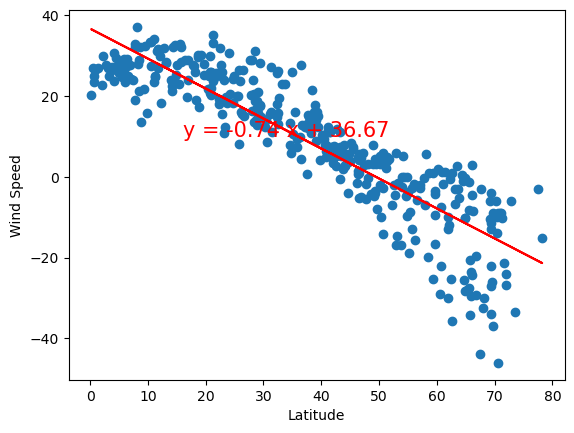

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (16,10))

The r-squared is: 0.4529425120738894


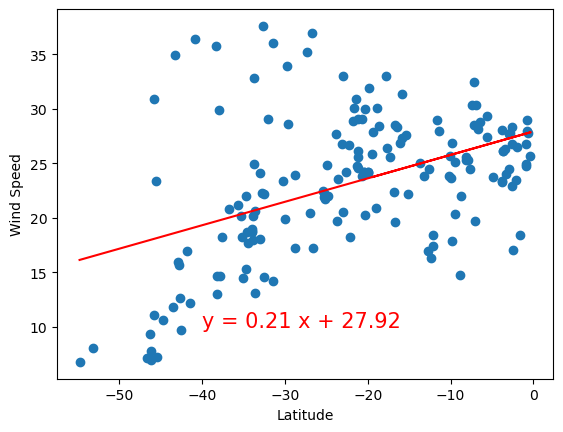

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-40,10))

###  Temperature vs. Latitude Linear Regression Plot

Comparing the linear regression of temperatures at changing latitudes in the northern vs southern hemisphere:
The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

In [17]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: 0.4236371790448503


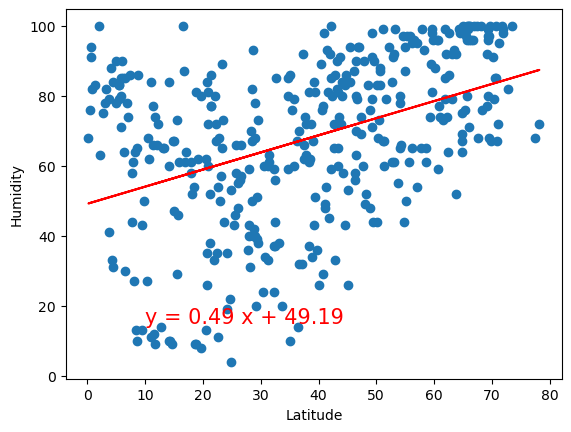

In [18]:
# northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (10,15))

The r-squared is: 0.1739242617286391


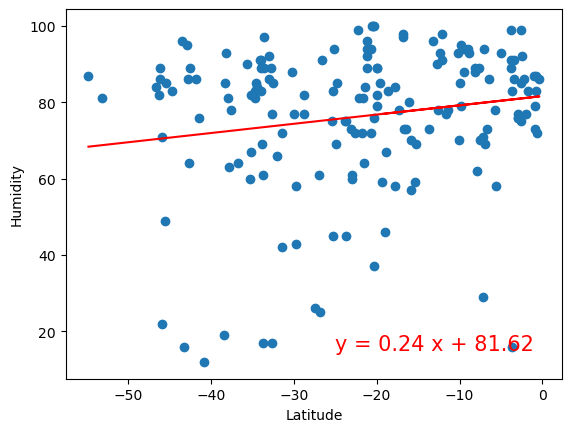

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-25,15))

The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.

As latitude increases in the northern hemisphere so does humidity, which means there is a positive correlation. There is no significant correlation between latitudes and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

In [20]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: 0.29052520814035726


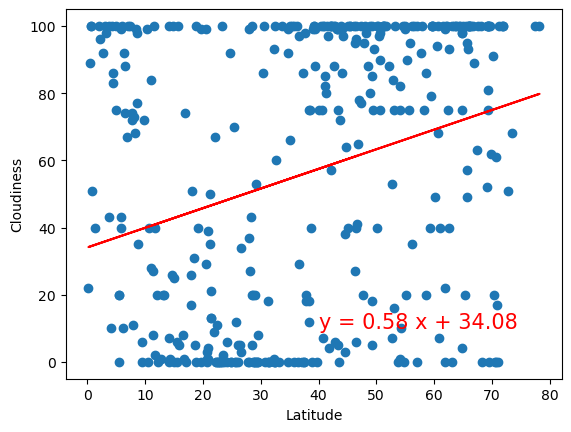

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.4467774111825071


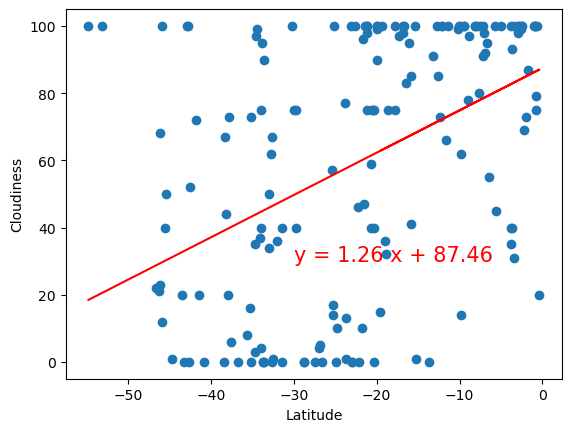

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, but there is significant positive relationship/correlation. On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.



### Wind Speed vs. Latitude Linear Regression Plot

In [23]:
#Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")
    print(f"The r-squared is: {rvalue}")
    plt.show()

The r-squared is: 0.05520524512738297


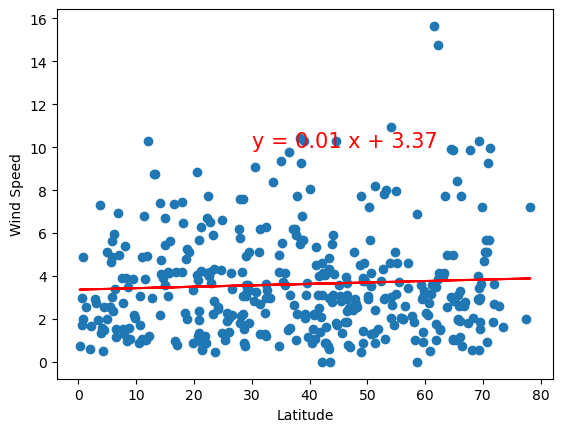

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (30,10))

The r-squared is: -0.2168102525609259


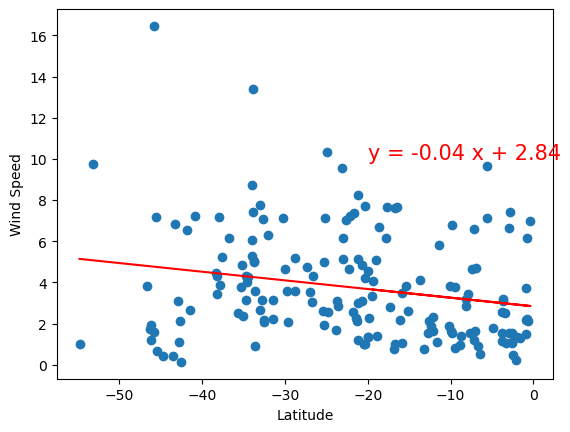

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-20,10))

The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation. On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed.